In [2]:
import numpy as np
import math
from scipy.integrate import simpson, solve_ivp
import matplotlib.pyplot as plt

In [6]:
#model for the scalar field
def model(z,y,H0,Omega_m,omega,zeta,m):
    #initial values
    psi = y[0]
    u = y[1]
    #unitless Hubble parameter
    gz=g(f,Omega_m,z)
    #differenetial equation for psi
    psiprime = -(u/((1+z)*gz))
    #differential equation for u
    uprime = (1/(1+z)) * ((6/((omega)*gz))* Omega_m * f * math.exp(-2*psi) * zeta + 3 * u + (m**2 * psi)/gz)
    #return all results
    F_prime = [psiprime,uprime]
    return F_prime

#Unitless Hubble parameter
def g(psi,u,Omega_m,omega,zeta,z):
    #cosmological constant
    Omega_l = 1-Omega_m-Omega_r
    #matter
    mass_term=(Omega_m*(1+z)**3)*(1+abs(zeta)*np.exp(-2*psi))
    #scalar field
    psi_term=(1/6)*(omega)*(u**2)
    #radiation
    rad_term=(Omega_r)*np.exp(-2*psi)*(1+z)**4
    gz=np.sqrt(mass_term+psi_term+rad_term+Omega_l)
    return gz

In [7]:
#function for Delta alpha/alpha
def Delta_alpha_over_alpha(psi):
    Delta_alpha_over_alpha=np.exp(2*psi)-1
    return Delta_alpha_over_alpha

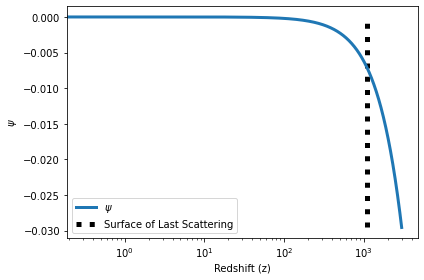

In [15]:
#radiation density
Omega_r = 5.44e-5
#maximum redshift to integrate to
z_max=3000
#redshift of the surface of last scattering
z_recomb = 1089.80
#list of redshifts to plot
z_list=np.linspace(0,z_max,10000)
#parameters of the model
H0 = 67.4
Omega_m = 0.315
omega = 1
zeta=1e-7
m = 0
arglist = (H0, Omega_m, omega, zeta, m)

#initial values
F0 = [0,0]

#solve the system
F = solve_ivp(model_noncon, [0,z_max], F0, args=arglist, dense_output=True)
#solve for psi
psi_list = F.sol(z_list)[0]

#plot
plt.figure()
plt.plot(z_list,psi_list,label="$\psi$",linewidth=3)
#vertical line at the surface of last scattering
plt.vlines(z_recomb,np.nanmin(psi_list),np.nanmax(psi_list),'k',linestyle=':',linewidth=5, label="Surface of Last Scattering")
plt.xlabel(r"Redshift (z)")
plt.ylabel(r"$\psi$")
plt.xscale("log")
plt.legend()
plt.tight_layout()
plt.show()